In [1]:
import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
# California Housing Prices
dataset = fetch_california_housing(as_frame = True)

X = dataset['data']
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [3]:
# Prepares a default instance of the random forest regressor
model = RandomForestRegressor()

In [4]:
# Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [5]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)

In [9]:
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Exact explainer: 4129it [30:01,  2.26it/s]                              


In [11]:
shap_values.values

array([[ 0.89993665,  0.04475397,  0.06120387, ..., -0.38150902,
         0.28200115,  0.12154787],
       [ 0.43965008,  0.17105895, -0.02956063, ...,  0.27973072,
        -0.32142213,  0.40975836],
       [ 0.01826068,  0.03161264, -0.04862953, ..., -0.33753483,
         0.27105337,  0.07071958],
       ...,
       [-0.14220104,  0.09026062, -0.0140179 , ..., -0.08136584,
         0.34640489, -0.02137629],
       [-0.28221749,  0.0044548 , -0.04193881, ...,  0.16724633,
         0.33460906, -0.29018849],
       [ 1.93018693,  0.21138809,  0.07286612, ...,  0.29696135,
         0.31157251,  0.05692896]])

In [12]:
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

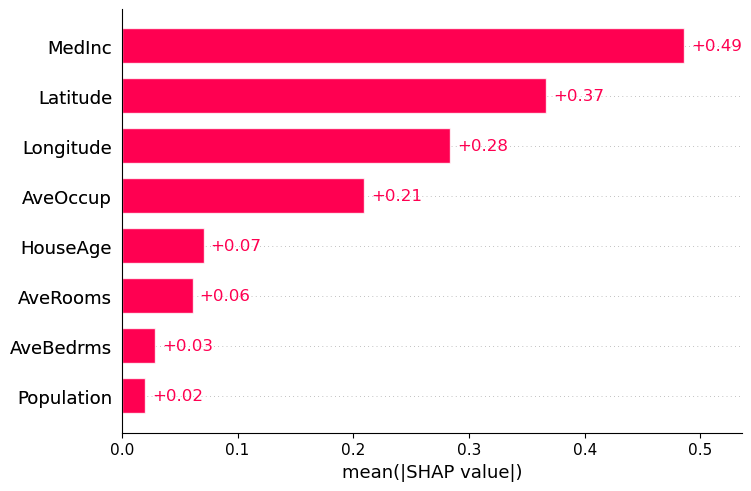

In [13]:
shap.plots.bar(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


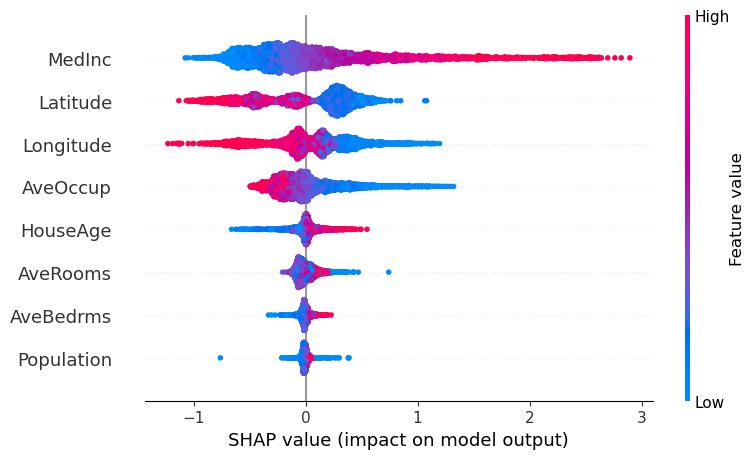

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


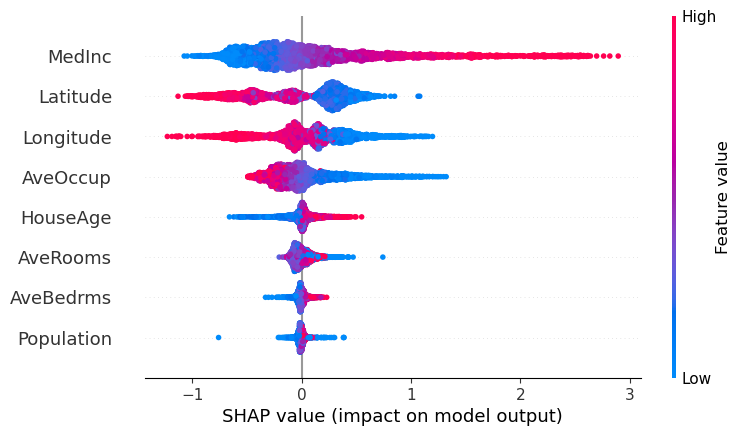

In [14]:
shap.summary_plot(shap_values)
# or 
shap.plots.beeswarm(shap_values)